In [37]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

Задание 1

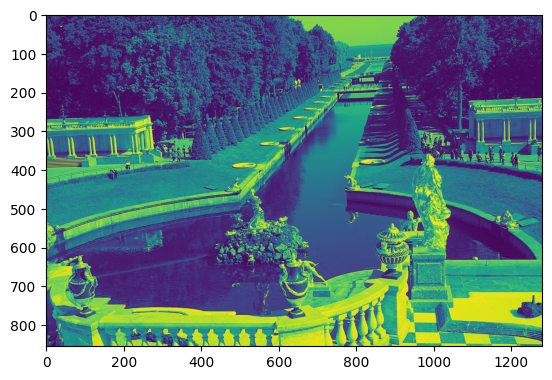

In [38]:
img = cv2.imread('images5/st-petersburg-2741190_1280.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

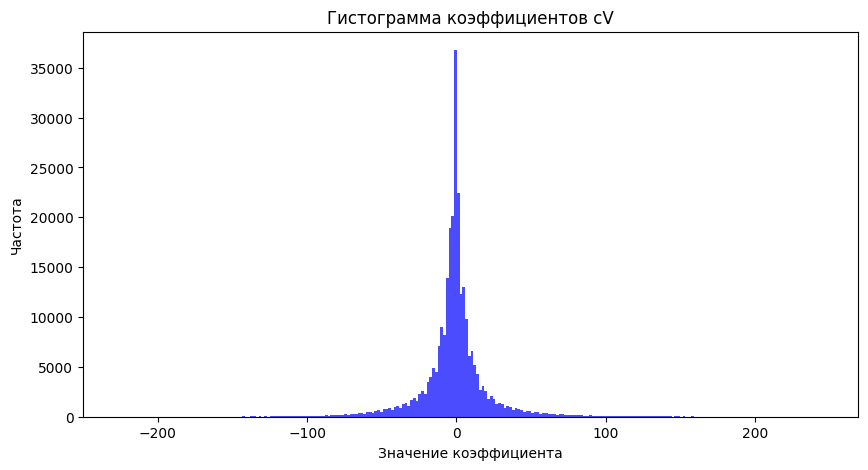

In [39]:
coeffs = pywt.dwt2(img, 'haar')
cA, (cH, cV, cD) = coeffs

plt.figure(figsize=(10, 5))
hist, bin_edges = np.histogram(cV.ravel(), bins=256)
plt.bar(bin_edges[:-1], hist, width=bin_edges[1] - bin_edges[0], color='blue', alpha=0.7)
plt.title("Гистограмма коэффициентов cV")
plt.xlabel("Значение коэффициента")
plt.ylabel("Частота")
plt.show()



In [40]:
h_max = np.max(hist)
print(f"Максимальное значение функции h(n): {h_max}")

Максимальное значение функции h(n): 36767


Задание 2 

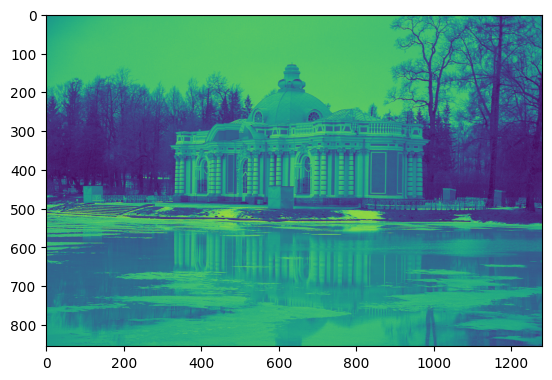

In [41]:
image = cv2.imread('images5/village.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image)

In [42]:
coeffs = pywt.dwt2(image, 'haar')
cA, (cH, cV, cD) = coeffs

coeffs1 = pywt.dwt2(cA, 'haar')
cA1, (cH1, cV1, cD1) = coeffs1

In [45]:
threshold = 90
mask = np.abs(cA1) < threshold
num_zeroed = np.sum(mask)
cA1[mask] = 0

print(f"Ответ: {num_zeroed}")

Ответ: 1494


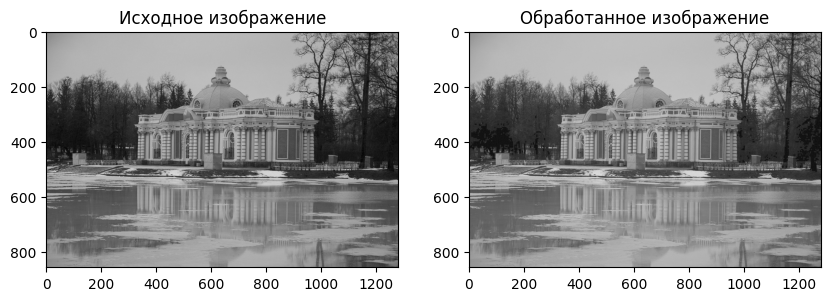

True

In [46]:
cA_reconstructed = pywt.idwt2((cA1, (cH1, cV1, cD1)), 'haar')
image_reconstructed = pywt.idwt2((cA_reconstructed, (cH, cV, cD)), 'haar')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Исходное изображение")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Обработанное изображение")
plt.imshow(image_reconstructed, cmap='gray')

plt.show()

cv2.imwrite('processed_image.jpg', image_reconstructed)
